In [1]:
# Simple extended BCubed implementation in Python for clustering evaluation
# Copyright 2015 Hugo Hromic
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#
# Extended BCubed algorithm taken from:
# Amigo, Enrique, et al. "A comparison of extrinsic clustering evaluation metrics
# based on formal constraints." Information retrieval 12.4 (2009): 461-486.

In [2]:
import time

import numpy as np
import pylab as pl
from matplotlib.pyplot import figure


from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import euclidean_distances

import math
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score


import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering


from scipy.spatial import ConvexHull,convex_hull_plot_2d
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import geopandas as gpd


In [4]:
record= pd.read_csv("/Users/brycechinn/Desktop/Research/data/CS_21Jan27.csv")

In [5]:
col=['Time_Seen','Species','Latitude','Longitude','Media']

In [6]:
record.columns = col
record['Time_Seen'] = pd.to_datetime(record.Time_Seen,utc=True).copy()
record['Month'] = record.Time_Seen.dt.month
record['Hour'] = record.Time_Seen.dt.hour
record['Year'] = record.Time_Seen.dt.year

In [7]:
#king county boundaries
maxLat = 47.7763
minLat = 47.1878
maxLon = -121.0941
minLon = -122.5346

In [8]:
rec19 = record[record.Year == 2019]

In [9]:
rec19_coyo = rec19[rec19.Species == 'Coyote']

In [10]:
rec19_coyo = rec19_coyo.drop(['Time_Seen','Species','Month','Hour','Year','Media'],axis=1)

In [11]:
rec19_king = rec19_coyo[(rec19_coyo['Latitude']>minLat)&(rec19_coyo['Latitude']<maxLat)&(rec19_coyo['Longitude']>minLon)&(rec19_coyo['Longitude']<maxLon)]

In [12]:
rec19_king_numpy = rec19_king.to_numpy()

In [13]:
north1 = [(47.777306,-122.391939),(47.77445,-122.322277),(47.753421,-122.33223)
         ,(47.741782,-122.330018),(47.731175,-122.323849),(47.714885,-122.32664)
         ,(47.708027,-122.337208),(47.723558,-122.368096),(47.777306,-122.391939)]

north2 = [(47.776936,-122.316294),(47.769153,-122.256715),(47.750237,-122.283654),
          (47.725728,-122.283476),(47.716051,-122.317827),
          (47.742956,-122.328801),(47.754329,-122.328989),(47.758325,-122.325363)
         ,(47.776936,-122.316294)]

north3 = [(47.71803,-122.367792),(47.711216,-122.348759),(47.683718,-122.366719)
         ,(47.670744,-122.406759),(47.699561,-122.397714),(47.71803,-122.367792)]

north4 = [(47.701782,-122.331078),(47.688784,-122.329232),(47.683006,-122.322881)
         ,(47.675502,-122.320817),(47.656121,-122.323046),(47.646367,-122.333264)
         ,(47.656299,-122.36872),(47.663706,-122.372928),(47.677638,-122.371214),
         (47.687869,-122.360551),(47.688389,-122.345874),(47.701782,-122.331078)]

north5 = [(47.712197,-122.32832),(47.724295,-122.283731),(47.674963,-122.247682)
         ,(47.656755,-122.277294),(47.649412,-122.296477),(47.65317,-122.312184)
         ,(47.664603,-122.320874),(47.677662,-122.318795),(47.69062,-122.326734)
         ,(47.712197,-122.32832)]
#(47.728935,-122.325037)

In [14]:
polygon_n1= Polygon(north1)
polygon_n2= Polygon(north2)
polygon_n3= Polygon(north3)
polygon_n4= Polygon(north4)
polygon_n5= Polygon(north5)

In [15]:
p_in_north1 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_n1.contains(point)):
        p_in_north1.append(p)
df_n1 = pd.DataFrame( p_in_north1, columns=['Lat','Long'])
df_n1['Label']="n1"
df_n1.count()

Lat      43
Long     43
Label    43
dtype: int64

In [16]:
p_in_north2 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_n2.contains(point)):
        p_in_north2.append(p)
        
df_n2 = pd.DataFrame( p_in_north2, columns=['Lat','Long'])
df_n2['Label']="n2"
df_n2.count()

Lat      61
Long     61
Label    61
dtype: int64

In [17]:
p_in_north3 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_n3.contains(point)):
        p_in_north3.append(p)
        
df_n3 = pd.DataFrame( p_in_north3, columns=['Lat','Long'])
df_n3['Label']="n3"
df_n3.count()

Lat      88
Long     88
Label    88
dtype: int64

In [18]:
p_in_north4 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_n4.contains(point)):
        p_in_north4.append(p)
        
df_n4 = pd.DataFrame( p_in_north4, columns=['Lat','Long'])
df_n4['Label']="n4"
df_n4.count()

Lat      232
Long     232
Label    232
dtype: int64

In [19]:
p_in_north5 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_n5.contains(point)):
        p_in_north5.append(p)
        
df_n5 = pd.DataFrame( p_in_north5, columns=['Lat','Long'])
df_n5['Label']="n5"
df_n5.count()

Lat      455
Long     455
Label    455
dtype: int64

In [20]:
frames = [df_n1,df_n2,df_n3,df_n4,df_n5]
labeled_df = pd.concat(frames)

In [21]:
north_side = ([47.777104,-122.389053],[47.774561,-122.268551],[47.7330218,-122.2867455],
              [47.680809,-122.24555],[47.651215,-122.27679],
              [47.650981,-122.31833],[47.645201,-122.334468],[47.670876,-122.408617],[47.695826,-122.400731],
              [47.7461816,-122.3773824],[47.777104,-122.389053])

In [22]:
north_region = Polygon(north_side)

In [23]:
p_in_NorthSeattle_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (north_region.contains(point)):
        p_in_NorthSeattle_2019.append(p)

In [24]:
df19 = pd.DataFrame(np.array(p_in_NorthSeattle_2019 ), columns=['Lat','Long'])
df19.count()

Lat     879
Long    879
dtype: int64

In [25]:
coyo19_kmeans5 = KMeans(n_clusters=5)
coyo19_kmeans5.fit(df19)

KMeans(n_clusters=5)

Text(0.5, 1.0, 'Coyote 2019 Data North Seattle Clusters K = 5')

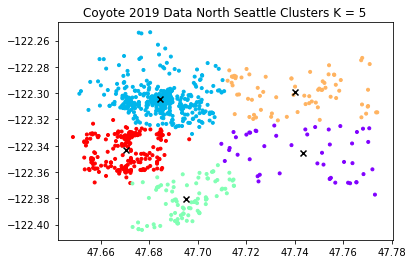

In [26]:
plt.xlim()
plt.scatter(df19.iloc[:,0], df19.iloc[:,1], c=coyo19_kmeans5.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeans5.cluster_centers_[:,0] ,coyo19_kmeans5.cluster_centers_[:,1], color='black',marker="x")
plt.title("Coyote 2019 Data North Seattle Clusters K = 5")

In [27]:
labeled_data = labeled_df.to_numpy()
len(labeled_data)


879

In [28]:
assigned_label = {}
for i in labeled_data:
    key = tuple((i[0],i[1]))
    assigned_label[key] = set([i[2]])

In [29]:
clusNorth_2019 = df19.copy()
clusNorth_2019['labels'] = coyo19_kmeans5.labels_
north_clus_output = clusNorth_2019.to_numpy()
cluster_output = {}

for i in north_clus_output:
    key = tuple((i[0],i[1]))
    cluster_output[key] = set([str(int(i[2]))])

In [30]:
import bcubed

# Kmeans

In [31]:
precision_k = bcubed.precision(cluster_output,assigned_label)
recall_k = bcubed.recall(cluster_output, assigned_label)
fscore_k = bcubed.fscore(precision_k,recall_k)
print("Kmeans:")
print("Precision: ", precision_k)
print("Recall: ", recall_k)
print("f1 score: ", fscore_k)

Kmeans:
Precision:  0.9340823307462846
Recall:  0.927456358886209
f1 score:  0.9307575525544648


# Hierarchical

In [32]:
hier_NorthSeattle = AgglomerativeClustering(n_clusters =5, affinity='euclidean',linkage='ward')
hier_NorthSeattle.fit_predict(df19)

array([1, 1, 1, 0, 3, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 3, 1, 1, 1, 1, 4, 2,
       2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 3, 2, 3, 2, 2, 1, 3, 0, 1, 2, 1, 1,
       1, 3, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 3, 2, 4, 2, 1, 2, 2, 2, 2,
       0, 2, 3, 4, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 4, 1,
       1, 1, 1, 3, 2, 2, 3, 1, 2, 1, 2, 2, 2, 3, 1, 2, 2, 1, 1, 2, 2, 1,
       0, 1, 1, 2, 3, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 4, 0, 2, 1,
       1, 2, 1, 2, 4, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 3, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 1, 2, 2, 2, 4, 1, 2, 3, 0, 2, 3, 1, 2, 2, 4, 1, 2,
       4, 2, 1, 1, 2, 2, 2, 1, 2, 3, 2, 4, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2,
       2, 2, 4, 0, 3, 1, 2, 2, 2, 1, 2, 4, 2, 3, 0, 3, 2, 2, 2, 2, 2, 3,
       0, 3, 4, 4, 1, 2, 2, 1, 2, 4, 2, 3, 0, 1, 3, 4, 2, 2, 1, 2, 4, 1,
       1, 1, 1, 2, 3, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 3, 1, 2, 4, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 4, 2, 1, 4, 2, 3, 2, 2, 1, 2, 2, 1, 4, 1, 0, 1,
       0, 4, 2, 0, 1, 2, 0, 2, 2, 0, 0, 4, 2, 1, 2,

Text(0.5, 1.0, 'Hierarchical 2019 Coyote North Seattle clusters, N=5')

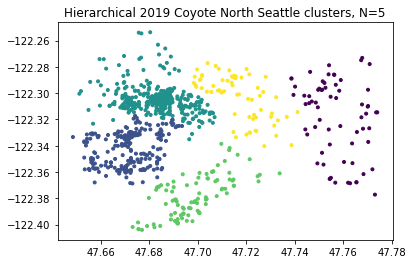

In [33]:
plt.scatter(df19.iloc[:,0],df19.iloc[:,1],c=hier_NorthSeattle.labels_,marker='.')
plt.title('Hierarchical 2019 Coyote North Seattle clusters, N=5')

In [34]:
HierClusNorthSea19 = df19.copy()
HierClusNorthSea19["labels"]= hier_NorthSeattle.labels_

In [35]:
north_HierClus_output = HierClusNorthSea19.to_numpy()
hier_cluster_output = {}

for i in north_HierClus_output:
    key = tuple((i[0],i[1]))
    hier_cluster_output[key] = set([str(int(i[2]))])

# Hierarchical

In [36]:
precision_h = bcubed.precision(hier_cluster_output,assigned_label)
recall_h = bcubed.recall(hier_cluster_output, assigned_label)
fscore_h = bcubed.fscore(precision_h,recall_h)
print("Hierachical:")
print("Precision: ", precision_h)
print("Recall: ", recall_h)
print("f1 score: ", fscore_h)

Hierachical:
Precision:  0.8663731275339136
Recall:  0.8274671960827178
f1 score:  0.8464733453401455


# North Seattle I5 West Kmeans

In [37]:
north_I5West = [(47.777582,-122.393571),(47.777063,-122.31907),(47.75349,-122.33195)
               ,(47.743568,-122.330726),(47.731228,-122.324207),(47.696001,-122.331076)
               ,(47.68359,-122.32384),(47.675427,-122.321018),(47.653452,-122.323363)
               ,(47.645024,-122.334349),(47.668713,-122.406661),(47.695749,-122.403716)
               ,(47.722332,-122.374118),(47.777582,-122.393571)]

polygon_NorthI5West = Polygon(north_I5West)
p_in_NorthI5West_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_NorthI5West.contains(point)):
        p_in_NorthI5West_2019.append(p)
        
df19_NorthI5West = pd.DataFrame(np.array(p_in_NorthI5West_2019) , columns=['Lat','Long'])

df19_NorthI5West.count()

Lat     363
Long    363
dtype: int64

In [38]:
#north seattle subregion 1
#North Seattle I5 West n1
p_in_northI5West_n1 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_n1.contains(point)):
        p_in_northI5West_n1.append(p)
df_I5Westn1 = pd.DataFrame( p_in_northI5West_n1, columns=['Lat','Long'])
df_I5Westn1['Label']="I5West_n1"
df_I5Westn1.count()

Lat      43
Long     43
Label    43
dtype: int64

In [39]:
#north seattle subregion 3
#North Seattle I5 West n2
p_in_northI5West_n2 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_n3.contains(point)):
        p_in_northI5West_n2.append(p)
df_I5Westn2 = pd.DataFrame( p_in_northI5West_n2, columns=['Lat','Long'])
df_I5Westn2['Label']="I5West_n2"
df_I5Westn2.count()

Lat      88
Long     88
Label    88
dtype: int64

In [40]:
#north seattle subregion 4
#North Seattle I5 West n3
p_in_northI5West_n3 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_n4.contains(point)):
        p_in_northI5West_n3.append(p)
df_I5Westn3 = pd.DataFrame( p_in_northI5West_n3, columns=['Lat','Long'])
df_I5Westn3['Label']="I5West_n3"
df_I5Westn3.count()

Lat      232
Long     232
Label    232
dtype: int64

In [41]:
coyo19_kmeans_NorthI5West = KMeans(n_clusters=3)
coyo19_kmeans_NorthI5West.fit(df19_NorthI5West)

KMeans(n_clusters=3)

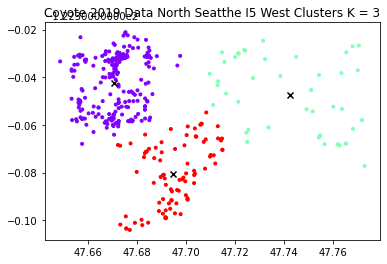

In [42]:
plt.xlim()
plt.scatter(df19_NorthI5West.iloc[:,0], df19_NorthI5West.iloc[:,1], c=coyo19_kmeans_NorthI5West.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeans_NorthI5West.cluster_centers_[:,0] ,coyo19_kmeans_NorthI5West.cluster_centers_[:,1], color='black',marker="x")
plt.title("Coyote 2019 Data North Seatthe I5 West Clusters K = 3")
plt.show()

In [43]:
frames_NorthI5West = [df_I5Westn1,df_I5Westn2,df_I5Westn3]
labeled_NorthI5West_df = pd.concat(frames_NorthI5West)

labeled_data_NorthI5West = labeled_NorthI5West_df.to_numpy()
len(labeled_data_NorthI5West)


363

In [44]:
assigned_label_northI5West = {}
for i in labeled_data_NorthI5West:
    key = tuple((i[0],i[1]))
    assigned_label_northI5West[key] = set([i[2]])

In [45]:
clusNorth_I5West = df19_NorthI5West.copy()
clusNorth_I5West['labels'] = coyo19_kmeans_NorthI5West.labels_
northI5West_clus_output = clusNorth_I5West.to_numpy()
cluster_output_nI5West = {}

for i in northI5West_clus_output:
    key = tuple((i[0],i[1]))
    cluster_output_nI5West[key] = set([str(int(i[2]))])

In [46]:
I5West_precision_k = bcubed.precision(cluster_output_nI5West,assigned_label_northI5West)
I5West_recall_k = bcubed.recall(cluster_output_nI5West, assigned_label_northI5West)
I5West_fscore_k = bcubed.fscore(I5West_precision_k,I5West_recall_k)
print("Kmeans:")
print("Precision: ", I5West_precision_k)
print("Recall: ", I5West_recall_k)
print("f1 score: ", I5West_fscore_k)

Kmeans:
Precision:  0.9735457380085478
Recall:  0.9728943755019559
f1 score:  0.9732199477683091


# North Seattle I5 East Kmeans

In [47]:
north_I5East = [(47.776966,-122.316826),(47.77538,-122.267817),(47.753716,-122.274812)
               ,(47.734184,-122.289579),(47.680384,-122.248595),(47.646914,-122.277606)
               ,(47.654357,-122.321337),(47.680037,-122.320769),(47.682739,-122.320448)
               ,(47.685447,-122.323816),(47.695406,-122.328655),(47.739373,-122.321528)
               ,(47.743557,-122.328866),(47.756354,-122.328308),(47.776966,-122.316826)]

polygon_NorthI5East = Polygon(north_I5East)



In [48]:
p_in_NorthI5East_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_NorthI5East.contains(point)):
        p_in_NorthI5East_2019.append(p)
        
df19_NorthI5East = pd.DataFrame(np.array(p_in_NorthI5East_2019) , columns=['Lat','Long'])

df19_NorthI5East.count()

Lat     516
Long    516
dtype: int64

In [49]:
#north seattle subregion 2
#North Seattle I5 East n1
p_in_northI5East_n1 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_n2.contains(point)):
        p_in_northI5East_n1.append(p)
df_I5Eastn1 = pd.DataFrame( p_in_northI5East_n1, columns=['Lat','Long'])
df_I5Eastn1['Label']="I5East_n1"
df_I5Eastn1.count()

Lat      61
Long     61
Label    61
dtype: int64

In [50]:
#north seattle subregion 5
#North Seattle I5 East n2
p_in_northI5East_n2 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_n5.contains(point)):
        p_in_northI5East_n2.append(p)
df_I5Eastn2 = pd.DataFrame( p_in_northI5East_n2, columns=['Lat','Long'])
df_I5Eastn2['Label']="I5East_n2"
df_I5Eastn2.count()

Lat      455
Long     455
Label    455
dtype: int64

In [51]:
coyo19_kmeans_NorthI5East = KMeans(n_clusters=2)
coyo19_kmeans_NorthI5East.fit(df19_NorthI5East)

KMeans(n_clusters=2)

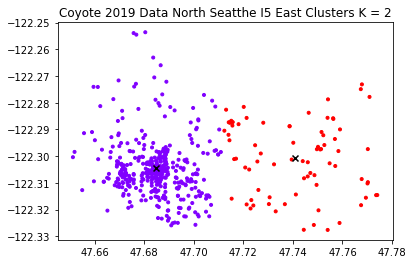

In [52]:
plt.xlim()
plt.scatter(df19_NorthI5East.iloc[:,0], df19_NorthI5East.iloc[:,1], c=coyo19_kmeans_NorthI5East.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeans_NorthI5East.cluster_centers_[:,0] ,coyo19_kmeans_NorthI5East.cluster_centers_[:,1], color='black',marker="x")
plt.title("Coyote 2019 Data North Seatthe I5 East Clusters K = 2")
plt.show()

In [53]:
frames_NorthI5East = [df_I5Eastn1,df_I5Eastn2]
labeled_NorthI5East_df = pd.concat(frames_NorthI5East)

labeled_data_NorthI5East = labeled_NorthI5East_df.to_numpy()
len(labeled_data_NorthI5East)
labeled_data_NorthI5East

array([[47.7459897965754, -122.3022840036133, 'I5East_n1'],
       [47.770245, -122.309741, 'I5East_n1'],
       [47.756931385414845, -122.2935762491949, 'I5East_n1'],
       ...,
       [47.688601736374174, -122.2988629851244, 'I5East_n2'],
       [47.70163724652119, -122.30501954709226, 'I5East_n2'],
       [47.70195296735662, -122.3225764566266, 'I5East_n2']], dtype=object)

In [54]:
assigned_label_northI5East = {}
for i in labeled_data_NorthI5East:
    key = tuple((i[0],i[1]))
    assigned_label_northI5East[key] = set([i[2]])

In [55]:
clusNorth_I5East = df19_NorthI5East.copy()
clusNorth_I5East['labels'] = coyo19_kmeans_NorthI5East.labels_
northI5East_clus_output = clusNorth_I5East.to_numpy()
cluster_output_nI5East = {}

for i in northI5East_clus_output:
    key = tuple((i[0],i[1]))
    cluster_output_nI5East[key] = set([str(int(i[2]))])

In [56]:
I5East_precision_k = bcubed.precision(cluster_output_nI5East,assigned_label_northI5East)
I5East_recall_k = bcubed.recall(cluster_output_nI5East, assigned_label_northI5East)
I5East_fscore_k = bcubed.fscore(I5East_precision_k,I5East_recall_k)
print("Kmeans:")
print("Precision: ", I5East_precision_k)
print("Recall: ", I5East_recall_k)
print("f1 score: ", I5East_fscore_k)

Kmeans:
Precision:  0.9503901186875746
Recall:  0.9396042617960425
f1 score:  0.9449664137722893


# North Seattle I5 West Hierarchical 

In [57]:
rec19_NorthI5West= AgglomerativeClustering(n_clusters =3, affinity='euclidean',linkage='ward')
rec19_NorthI5West.fit_predict(df19_NorthI5West)

array([1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0, 2, 0, 0, 2, 1,
       1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 2, 1,
       0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2,
       2, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1,
       1, 2, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1,

In [58]:
HierClusNorthI5West19 = df19_NorthI5West.copy()
HierClusNorthI5West19["labels"]= rec19_NorthI5West.labels_

In [59]:
northI5West_HierClus_output = HierClusNorthI5West19.to_numpy()
hier_cluster_output_I5West = {}

for i in northI5West_HierClus_output:
    key = tuple((i[0],i[1]))
    hier_cluster_output_I5West[key] = set([str(int(i[2]))])

In [60]:
I5West_precision_h = bcubed.precision(hier_cluster_output_I5West,assigned_label_northI5West)
I5West_recall_h = bcubed.recall(hier_cluster_output_I5West, assigned_label_northI5West)
I5West_fscore_h = bcubed.fscore(I5West_precision_h,I5West_recall_h)
print("Hierachical:")
print("Precision: ", I5West_precision_h)
print("Recall: ", I5West_recall_h)
print("f1 score: ", I5West_fscore_h)

Hierachical:
Precision:  0.9128990439150867
Recall:  0.9013899323816679
f1 score:  0.9071079835865299


# North Seattle I5 East Hierarchical

In [61]:
rec19_NorthI5East= AgglomerativeClustering(n_clusters =2, affinity='euclidean',linkage='ward')
rec19_NorthI5East.fit_predict(df19_NorthI5East)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [62]:
HierClusNorthI5East19 = df19_NorthI5East.copy()
HierClusNorthI5East19["labels"]= rec19_NorthI5East.labels_

In [63]:
northI5East_HierClus_output = HierClusNorthI5East19.to_numpy()
hier_cluster_output_I5East = {}

for i in northI5East_HierClus_output:
    key = tuple((i[0],i[1]))
    hier_cluster_output_I5East[key] = set([str(int(i[2]))])

In [64]:
I5East_precision_h = bcubed.precision(hier_cluster_output_I5East,assigned_label_northI5East)
I5East_recall_h = bcubed.recall(hier_cluster_output_I5East, assigned_label_northI5East)
I5East_fscore_h = bcubed.fscore(I5East_precision_h,I5East_recall_h)
print("Hierachical:")
print("Precision: ", I5East_precision_h)
print("Recall: ", I5East_recall_h)
print("f1 score: ", I5East_fscore_h)

Hierachical:
Precision:  0.908359524797881
Recall:  0.863831267666884
f1 score:  0.8855359853349907


# I5 South

In [65]:
South_I90 = [(47.577466,-122.171425),(47.56658,-122.175545),(47.55546,-122.183098),(47.545727,-122.18),(47.533675,-122.191681),
                  (47.522316,-122.191681),(47.501446,-122.189621),(47.4884455,-122.186188),(47.47755,-122.190308),(47.46643,-122.205757),
                 (47.455734,-122.21281),(47.443197,-122.213654),(47.433211,-122.216057),(47.399758,-122.216057),(47.387905,-122.228073),
                 (47.376281,-122.235627),(47.364888,-122.24009),(47.351166,-122.24112),(47.331392,-122.241806),(47.331624,-122.243866),
                 (47.320221,-122.243866),(47.312773,-122.22773),(47.307186,-122.210907),(47.306022,-122.194771),(47.310445,-122.177605),
                 (47.323014,-122.169709),(47.335347,-122.157349),(47.346049,-122.149453),(47.338609,-122.136063),(47.369771,-122.118554),
                 (47.382558,-122.082161),(47.394878,-122.052636),(47.405567,-122.0039246),(47.416952,-122.029976),(47.422759,-122.01281),
                 (47.433908,-121.997784),(47.447608,-121.965088),(47.460608,-121.965088),(47.471981,-121.944832),(47.478479,-121.927666),
                 (47.481959,-121.90947),(47.487527,-121.89402),(47.498894,-121.889557),(47.520229,-121.938652),(47.529503,-121.955475),
                 (47.531821,-121.971611),(47.532284,-122.00457),(47.530198,-122.02288),(47.530894,-122.038216),(47.542109,-122.051606),
                 (47.561252,-122.100357),(47.572603,-122.11718),(47.58094,-122.154946)]

x = []
for p in South_I90:
    temp = p[1]
    temp = temp-0.003 # Moving points over just a bit 
    t = (p[0],temp)
    x.append(t)

South_I90 = x

I90_South_South = [] #Create array of I90 South points below WA-169

for p in South_I90:
    if(p[0] > 47.4): #Latitude value of 47.4 used as it is the lowest point of WA-169 (the separator)
        South_I90.remove(p)
        I90_South_South.append(p)

I90_South_North = South_I90 #Contains points above WA-169


# I90 South North 

# Hierarchical

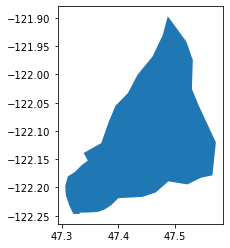

In [66]:
polygon_I90_South_North = Polygon(I90_South_North)
p = gpd.GeoSeries(polygon_I90_South_North)
p.plot()
plt.show()

In [67]:
p_in_I90_South_North_2019 = []

for p in rec19_king_numpy:
    point= Point(p[0],p[1])
    if(polygon_I90_South_North.contains(point)):
        p_in_I90_South_North_2019.append(p)

In [68]:
df19_I90_South_North = pd.DataFrame(np.array(p_in_I90_South_North_2019),columns = ['Lat','Long'])
df19_I90_South_North.count()

Lat     83
Long    83
dtype: int64

In [69]:
hier_I90_South_North = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hier_I90_South_North.fit_predict(df19_I90_South_North)

array([1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 2, 1, 0, 2, 0, 0,
       2, 1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 1,
       2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 2, 2, 2])

Text(0.5, 1.0, 'Hierarchical 2019 Coyote I90 South North N=3')

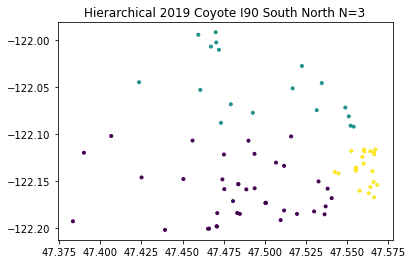

In [70]:
plt.scatter(df19_I90_South_North.iloc[:,0],df19_I90_South_North.iloc[:,1],c= hier_I90_South_North.labels_, marker = '.')
plt.title('Hierarchical 2019 Coyote I90 South North N=3')

In [71]:
HierClusI90SouthNorth = df19_I90_South_North.copy()
HierClusI90SouthNorth["labels"]= hier_I90_South_North.labels_

In [72]:
frames_I90SouthNorth = [df19_I90_South_North]

labeled_I90SouthNorth_df = pd.concat(frames_I90SouthNorth)
labeled_I90SouthNorth = labeled_I90SouthNorth_df.to_numpy()
len(labeled_I90SouthNorth)


83

In [73]:
assigned_label_northI90SouthNorth = {}
temp = ['I90 South North']

for i in labeled_I90SouthNorth:
    i=np.append(i,'I90 South North')
    

for i in labeled_I90SouthNorth:
    key = tuple((i[0],i[1]))
    assigned_label_northI90SouthNorth[key] = set(['I90 South North'])

In [74]:
northI90SouthNorth_HierClus_output = HierClusI90SouthNorth.to_numpy()
hier_cluster_output_hier_I90_South_North = {}

for i in northI90SouthNorth_HierClus_output:
    key = tuple((i[0],i[1]))
    hier_cluster_output_hier_I90_South_North[key] = set([str(int(i[2]))])
    

In [75]:
I90_South_North_precision_h = bcubed.precision(hier_cluster_output_hier_I90_South_North,assigned_label_northI90SouthNorth)
I90_South_North_recall_h = bcubed.recall(hier_cluster_output_hier_I90_South_North, assigned_label_northI90SouthNorth)
I90_South_North_fscore_h = bcubed.fscore(I90_South_North_precision_h,I90_South_North_recall_h)
print("Hierachical:")
print("Precision: ", I90_South_North_precision_h)
print("Recall: ",I90_South_North_recall_h)
print("f1 score: ", I90_South_North_fscore_h)

Hierachical:
Precision:  1.0
Recall:  0.36594571055305564
f1 score:  0.5358129649309246


# KMeans 

In [76]:
coyo19_kmeans_I90SouthNorth = KMeans(n_clusters=2)
coyo19_kmeans_I90SouthNorth.fit(df19_I90_South_North)

KMeans(n_clusters=2)

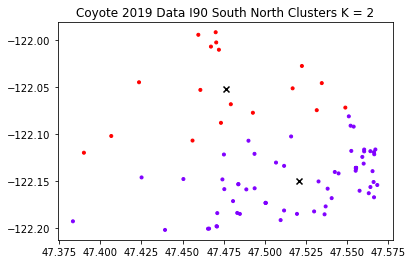

In [77]:
plt.xlim()
plt.scatter(df19_I90_South_North.iloc[:,0], df19_I90_South_North.iloc[:,1], c=coyo19_kmeans_I90SouthNorth.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeans_I90SouthNorth.cluster_centers_[:,0] ,coyo19_kmeans_I90SouthNorth.cluster_centers_[:,1], color='black',marker="x")
plt.title("Coyote 2019 Data I90 South North Clusters K = 2")
plt.show()

In [78]:
clusNorth_I90SouthNorth = df19_I90_South_North.copy()
clusNorth_I90SouthNorth["labels"] =coyo19_kmeans_I90SouthNorth.labels_
northI90SouthNorth_clus_output = clusNorth_I90SouthNorth.to_numpy()
cluster_output_I90SouthNorth = {}

for i in northI90SouthNorth_clus_output:
    key = tuple((i[0],i[1]))
    cluster_output_I90SouthNorth[key] = set([str(int(i[2]))])

In [79]:
I90_South_North_precision_k = bcubed.precision(cluster_output_I90SouthNorth,assigned_label_northI90SouthNorth)
I90_South_North_recall_k = bcubed.recall(cluster_output_I90SouthNorth, assigned_label_northI90SouthNorth)
I90_South_North_fscore_k = bcubed.fscore(I90_South_North_precision_k,I90_South_North_recall_k)
print("KMeans:")
print("Precision: ", I90_South_North_precision_k)
print("Recall: ",I90_South_North_recall_k)
print("f1 score: ", I90_South_North_fscore_k)

KMeans:
Precision:  1.0
Recall:  0.6603280592248512
f1 score:  0.7954187795069069


# I90 South South

# Hierarchical

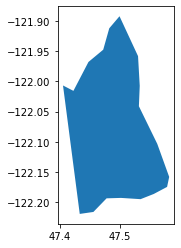

In [80]:
polygon_I90_South_South = Polygon(I90_South_South)
p = gpd.GeoSeries(polygon_I90_South_South)
p.plot()
plt.show()

In [81]:
p_in_I90_South_South_2019 = []

for p in rec19_king_numpy:
    point= Point(p[0],p[1])
    if(polygon_I90_South_South.contains(point)):
        p_in_I90_South_South_2019.append(p)

df19_I90_South_South = pd.DataFrame(np.array(p_in_I90_South_South_2019),columns = ['Lat','Long'])
df19_I90_South_South.count()

Lat     79
Long    79
dtype: int64

In [82]:
hier_I90_South_South = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hier_I90_South_South.fit_predict(df19_I90_South_South)

HierClusI90SouthSouth = df19_I90_South_South.copy()
HierClusI90SouthSouth["labels"]= hier_I90_South_South.labels_

In [83]:
frames_I90SouthSouth = [df19_I90_South_South]

labeled_I90SouthSouth_df = pd.concat(frames_I90SouthSouth)
labeled_I90SouthSouth = labeled_I90SouthSouth_df.to_numpy()
len(labeled_I90SouthSouth)


79

In [84]:
assigned_label_northI90SouthSouth = {}
temp = ['I90 South South']

for i in labeled_I90SouthSouth:
    i=np.append(i,'I90 South North')
    

for i in labeled_I90SouthSouth:
    key = tuple((i[0],i[1]))
    assigned_label_northI90SouthSouth[key] = set(['I90 South South'])

In [85]:
I90SouthSouth_HierClus_output = HierClusI90SouthSouth.to_numpy()
hier_cluster_output_hier_I90_South_South = {}

for i in I90SouthSouth_HierClus_output:
    key = tuple((i[0],i[1]))
    hier_cluster_output_hier_I90_South_South[key] = set([str(int(i[2]))])

In [86]:
I90_South_South_precision_h = bcubed.precision(hier_cluster_output_hier_I90_South_South,assigned_label_northI90SouthSouth)
I90_South_South_recall_h = bcubed.recall(hier_cluster_output_hier_I90_South_South, assigned_label_northI90SouthSouth)
I90_South_South_fscore_h = bcubed.fscore(I90_South_South_precision_h,I90_South_South_recall_h)
print("Hierachical:")
print("Precision: ", I90_South_South_precision_h)
print("Recall: ",I90_South_South_recall_h)
print("f1 score: ", I90_South_South_fscore_h)

Hierachical:
Precision:  1.0
Recall:  0.33888799871815406
f1 score:  0.506223073240785


# KMeans

In [87]:
coyo19_kmeans_I90SouthSouth = KMeans(n_clusters=2)
coyo19_kmeans_I90SouthSouth.fit(df19_I90_South_South)

KMeans(n_clusters=2)

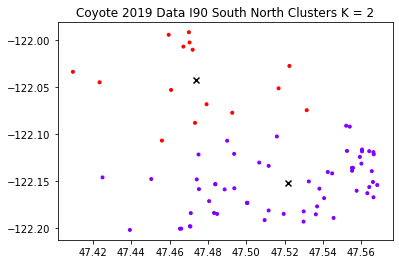

In [88]:
plt.xlim()
plt.scatter(df19_I90_South_South.iloc[:,0], df19_I90_South_South.iloc[:,1], c=coyo19_kmeans_I90SouthSouth.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeans_I90SouthSouth.cluster_centers_[:,0] ,coyo19_kmeans_I90SouthSouth.cluster_centers_[:,1], color='black',marker="x")
plt.title("Coyote 2019 Data I90 South North Clusters K = 2")
plt.show()

In [89]:
clusNorth_I90SouthSouth = df19_I90_South_South.copy()
clusNorth_I90SouthSouth["labels"] =coyo19_kmeans_I90SouthSouth.labels_
I90SouthSouth_clus_output = clusNorth_I90SouthSouth.to_numpy()
cluster_output_I90SouthSouth = {}

for i in I90SouthSouth_clus_output:
    key = tuple((i[0],i[1]))
    cluster_output_I90SouthSouth[key] = set([str(int(i[2]))])

In [90]:
I90_South_South_precision_k = bcubed.precision(cluster_output_I90SouthSouth,assigned_label_northI90SouthSouth)
I90_South_South_recall_k = bcubed.recall(cluster_output_I90SouthSouth, assigned_label_northI90SouthSouth)
I90_South_South_fscore_k = bcubed.fscore(I90_South_South_precision_k,I90_South_South_recall_k)
print("KMeans:")
print("Precision: ", I90_South_South_precision_k)
print("Recall: ",I90_South_South_recall_k)
print("f1 score: ", I90_South_South_fscore_k)

KMeans:
Precision:  1.0
Recall:  0.6923569940714627
f1 score:  0.818216246922931


# I90 Northwest

# Hierarchical

In [91]:
I90NW = [(47.769072,-122.259744),(47.769444,-122.191219),(47.759983,-122.187785),
         (47.728554,-122.195599),(47.71055,-122.185608),(47.610465,-122.192699),
         (47.600743,-122.184459),(47.586966,-122.181541),(47.588008,-122.191326),
         (47.617871,-122.241966),(47.769025,-122.260156)]

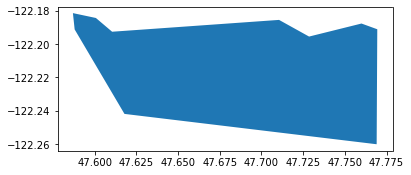

In [92]:
polygon_I90NW = Polygon(I90NW)
p = gpd.GeoSeries(polygon_I90NW)
p.plot()
plt.show()

In [93]:
p_in_I90NW_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_I90NW.contains(point)):
        p_in_I90NW_2019.append(p)
        
df19_I90NW = pd.DataFrame(np.array(p_in_I90NW_2019) , columns=['Lat','Long'])
df19_I90NW.count()

Lat     35
Long    35
dtype: int64

In [94]:
hier_I90NW = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hier_I90NW.fit_predict(df19_I90NW)

HierClusI90NW = df19_I90NW.copy()
HierClusI90NW["labels"]= hier_I90NW.labels_

In [95]:
frames_I90NW = [df19_I90NW]

labeled_I90NW_df = pd.concat(frames_I90NW)
labeled_I90NW = labeled_I90NW_df.to_numpy()
len(labeled_I90NW)

35

In [96]:
assigned_label_I90NW = {}
temp = ['I90 Northwest']

for i in labeled_I90NW:
    i=np.append(i,'I90 Northwest')
    

for i in labeled_I90NW:
    key = tuple((i[0],i[1]))
    assigned_label_I90NW[key] = set(['I90 Northwest'])

In [97]:
I90NW_HierClus_output = HierClusI90NW.to_numpy()
hier_cluster_output_hier_I90NW = {}

for i in I90NW_HierClus_output:
    key = tuple((i[0],i[1]))
    hier_cluster_output_hier_I90NW[key] = set([str(int(i[2]))])

In [98]:
I90NW_precision_h = bcubed.precision(hier_cluster_output_hier_I90NW,assigned_label_I90NW)
I90NW_recall_h = bcubed.recall(hier_cluster_output_hier_I90NW, assigned_label_I90NW)
I90NW_fscore_h = bcubed.fscore(I90NW_precision_h,I90NW_recall_h)
print("Hierachical:")
print("Precision: ", I90NW_precision_h)
print("Recall: ",I90NW_recall_h)
print("f1 score: ", I90NW_fscore_h)

Hierachical:
Precision:  1.0
Recall:  0.3730612244897959
f1 score:  0.5434007134363852


# Kmeans

In [99]:
coyo19_kmeans_I90NW = KMeans(n_clusters=2)
coyo19_kmeans_I90NW.fit(df19_I90NW)

KMeans(n_clusters=2)

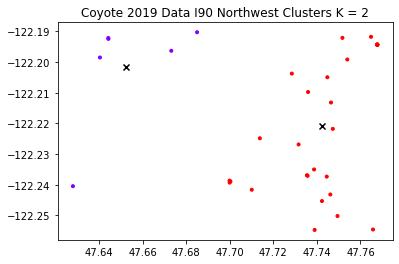

In [100]:
plt.xlim()
plt.scatter(df19_I90NW.iloc[:,0], df19_I90NW.iloc[:,1], c=coyo19_kmeans_I90NW.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeans_I90NW.cluster_centers_[:,0] ,coyo19_kmeans_I90NW.cluster_centers_[:,1], color='black',marker="x")
plt.title("Coyote 2019 Data I90 Northwest Clusters K = 2")
plt.show()

In [101]:
clusNorth_I90NW = df19_I90NW.copy()
clusNorth_I90NW["labels"] =coyo19_kmeans_I90NW.labels_
I90NW_clus_output = clusNorth_I90NW.to_numpy()
cluster_output_I90NW = {}

for i in I90NW_clus_output:
    key = tuple((i[0],i[1]))
    cluster_output_I90NW[key] = set([str(int(i[2]))])

In [102]:
I90NW_precision_k = bcubed.precision(cluster_output_I90NW,assigned_label_I90NW)
I90NW_recall_k = bcubed.recall(cluster_output_I90NW, assigned_label_I90NW)
I90NW_fscore_k = bcubed.fscore(I90NW_precision_k,I90NW_recall_k)
print("KMeans:")
print("Precision: ", I90NW_precision_k)
print("Recall: ",I90NW_recall_k)
print("f1 score: ", I90NW_fscore_k)

KMeans:
Precision:  1.0
Recall:  0.7159183673469388
f1 score:  0.8344433872502378


# I90 Northeast

# Hierarchical

In [103]:
I90NE = [(47.769536,-122.188188),(47.772801,-121.892734),(47.513179,-121.883059),
         (47.536486,-121.946196),(47.539219,-122.017866),(47.581722,-122.13229),
         (47.587446,-122.17684),(47.605157,-122.179071),(47.610365,-122.185766),
         (47.708628,-122.176988),(47.728038,-122.185287),(47.761184,-122.180994)]

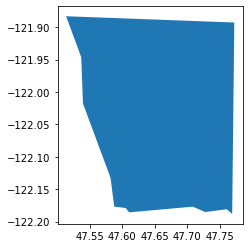

In [104]:
polygon_I90NE = Polygon(I90NE)
p = gpd.GeoSeries(polygon_I90NE)
p.plot()
plt.show()

In [105]:
p_in_I90NE_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_I90NE.contains(point)):
        p_in_I90NE_2019.append(p)
        
df19_I90NE = pd.DataFrame(np.array(p_in_I90NE_2019) , columns=['Lat','Long'])
df19_I90NE.count()

Lat     185
Long    185
dtype: int64

In [106]:
hier_I90NE = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hier_I90NE.fit_predict(df19_I90NE)

HierClusI90NE = df19_I90NE.copy()
HierClusI90NE["labels"]= hier_I90NE.labels_

In [107]:
frames_I90NE = [df19_I90NE]

labeled_I90NE_df = pd.concat(frames_I90NE)
labeled_I90NE = labeled_I90NE_df.to_numpy()
len(labeled_I90NE)

185

In [108]:
assigned_label_I90NE = {}
temp = ['I90 Northeast']

for i in labeled_I90NE:
    i=np.append(i,'I90 Northeast')
    

for i in labeled_I90NE:
    key = tuple((i[0],i[1]))
    assigned_label_I90NE[key] = set(['I90 Northeast'])

In [109]:
I90NE_HierClus_output = HierClusI90NE.to_numpy()
hier_cluster_output_hier_I90NE = {}

for i in I90NE_HierClus_output:
    key = tuple((i[0],i[1]))
    hier_cluster_output_hier_I90NE[key] = set([str(int(i[2]))])

In [110]:
I90NE_precision_h = bcubed.precision(hier_cluster_output_hier_I90NE,assigned_label_I90NE)
I90NE_recall_h = bcubed.recall(hier_cluster_output_hier_I90NE, assigned_label_I90NE)
I90NE_fscore_h = bcubed.fscore(I90NE_precision_h,I90NE_recall_h)
print("Hierachical:")
print("Precision: ", I90NE_precision_h)
print("Recall: ",I90NE_recall_h)
print("f1 score: ", I90NE_fscore_h)

Hierachical:
Precision:  1.0
Recall:  0.43952783739426843
f1 score:  0.6106555579916686


# Kmeans

In [111]:
coyo19_kmeans_I90NE = KMeans(n_clusters=2)
coyo19_kmeans_I90NE.fit(df19_I90NE)

KMeans(n_clusters=2)

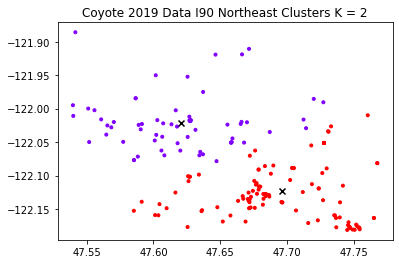

In [112]:
plt.xlim()
plt.scatter(df19_I90NE.iloc[:,0], df19_I90NE.iloc[:,1], c=coyo19_kmeans_I90NE.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeans_I90NE.cluster_centers_[:,0] ,coyo19_kmeans_I90NE.cluster_centers_[:,1], color='black',marker="x")
plt.title("Coyote 2019 Data I90 Northeast Clusters K = 2")
plt.show()

In [113]:
clusNorth_I90NE = df19_I90NE.copy()
clusNorth_I90NE["labels"] =coyo19_kmeans_I90NE.labels_
I90NE_clus_output = clusNorth_I90NE.to_numpy()
cluster_output_I90NE = {}

for i in I90NE_clus_output:
    key = tuple((i[0],i[1]))
    cluster_output_I90NE[key] = set([str(int(i[2]))])

In [114]:
I90NE_precision_k = bcubed.precision(cluster_output_I90NE,assigned_label_I90NE)
I90NE_recall_k = bcubed.recall(cluster_output_I90NE, assigned_label_I90NE)
I90NE_fscore_k = bcubed.fscore(I90NE_precision_k,I90NE_recall_k)
print("KMeans:")
print("Precision: ", I90NE_precision_k)
print("Recall: ",I90NE_recall_k)
print("f1 score: ", I90NE_fscore_k)

KMeans:
Precision:  1.0
Recall:  0.5227875268274208
f1 score:  0.6866191344718952


# I5 Southwest

# Hierarchical

In [115]:
I5SW = [(47.662994,-122.422896),(47.64459,-122.326657),(47.608262,-122.333524),
        (47.597151,-122.322537),(47.554766,-122.323224),(47.489985,-122.268842),
        (47.479081,-122.275709),(47.457729,-122.266096),(47.434256,-122.273052),
        (47.418461,-122.293994),(47.384207,-122.292761),(47.354677,-122.299284),
        (47.34421,-122.29482),(47.283224,-122.310753),(47.265987,-122.333756),
        (47.315821,-122.402421),(47.365074,-122.312615),(47.451926,-122.376551)]

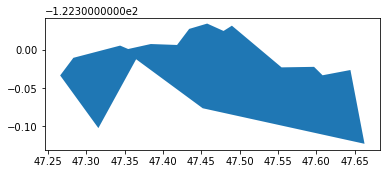

In [116]:
polygon_I5SW = Polygon(I5SW)
p = gpd.GeoSeries(polygon_I5SW)
p.plot()
plt.show()

In [117]:
p_in_I5SW_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_I5SW.contains(point)):
        p_in_I5SW_2019.append(p)
        
df19_I5SW = pd.DataFrame(np.array(p_in_I5SW_2019) , columns=['Lat','Long'])
df19_I5SW.count()

Lat     17
Long    17
dtype: int64

In [118]:
hier_I5SW = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hier_I5SW.fit_predict(df19_I5SW)

HierClusI5SW = df19_I5SW.copy()
HierClusI5SW["labels"]= hier_I5SW.labels_

In [119]:
frames_I5SW = [df19_I5SW]

labeled_I5SW_df = pd.concat(frames_I5SW)
labeled_I5SW = labeled_I5SW_df.to_numpy()
len(labeled_I5SW)

17

In [120]:
assigned_label_I5SW = {}
temp = ['I5 Southwest']

for i in labeled_I5SW:
    i=np.append(i,'I5 Southwest')
    

for i in labeled_I5SW:
    key = tuple((i[0],i[1]))
    assigned_label_I5SW[key] = set(['I5 Southwest'])

In [121]:
I5SW_HierClus_output = HierClusI5SW.to_numpy()
hier_cluster_output_hier_I5SW = {}

for i in I5SW_HierClus_output:
    key = tuple((i[0],i[1]))
    hier_cluster_output_hier_I5SW[key] = set([str(int(i[2]))])

In [122]:
I5SW_precision_h = bcubed.precision(hier_cluster_output_hier_I5SW,assigned_label_I5SW)
I5SW_recall_h = bcubed.recall(hier_cluster_output_hier_I5SW, assigned_label_I5SW)
I5SW_fscore_h = bcubed.fscore(I5SW_precision_h,I5SW_recall_h)
print("Hierachical:")
print("Precision: ", I5SW_precision_h)
print("Recall: ",I5SW_recall_h)
print("f1 score: ", I5SW_fscore_h)

Hierachical:
Precision:  1.0
Recall:  0.375
f1 score:  0.5454545454545454


# Kmeans

In [123]:
coyo19_kmeans_I5SW = KMeans(n_clusters=2)
coyo19_kmeans_I5SW.fit(df19_I5SW)

KMeans(n_clusters=2)

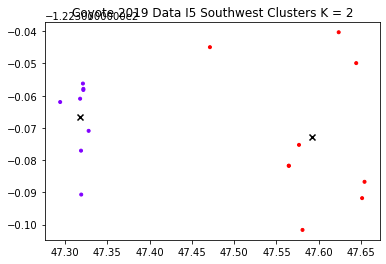

In [124]:
plt.xlim()
plt.scatter(df19_I5SW.iloc[:,0], df19_I5SW.iloc[:,1], c=coyo19_kmeans_I5SW.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeans_I5SW.cluster_centers_[:,0] ,coyo19_kmeans_I5SW.cluster_centers_[:,1], color='black',marker="x")
plt.title("Coyote 2019 Data I5 Southwest Clusters K = 2")
plt.show()

In [125]:
clusNorth_I5SW = df19_I5SW.copy()
clusNorth_I5SW["labels"] =coyo19_kmeans_I5SW.labels_
I5SW_clus_output = clusNorth_I5SW.to_numpy()
cluster_output_I5SW = {}

for i in I5SW_clus_output:
    key = tuple((i[0],i[1]))
    cluster_output_I5SW[key] = set([str(int(i[2]))])

In [126]:
I5SW_precision_k = bcubed.precision(cluster_output_I5SW,assigned_label_I5SW)
I5SW_recall_k = bcubed.recall(cluster_output_I5SW, assigned_label_I5SW)
I5SW_fscore_k = bcubed.fscore(I5SW_precision_k,I5SW_recall_k)
print("KMeans:")
print("Precision: ", I5SW_precision_k)
print("Recall: ",I5SW_recall_k)
print("f1 score: ", I5SW_fscore_k)

KMeans:
Precision:  1.0
Recall:  0.5
f1 score:  0.6666666666666666
